In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.18/00


In [59]:
print(ROOT.TMath.Pi())
pi=ROOT.TMath.Pi()
R=14600.0

3.141592653589793


In [ ]:
112,96,119,142,140,145,125,130,124,121,117,108,105,110
12.857,51.428,77.142,107.396,136.367,149.109,162.082,174.939,187.796,200.653,261.671,282.854,308.568,347.139
109,97,108,146,138,140,127,132,126,118,113,110,100,112

In [58]:
num=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
#deltaD=np.array([112,96,119,142,140,145,125,130,124,121,117,108,105,110]) #560
deltaD=np.array([109,97,108,146,138,140,127,132,126,118,113,110,100,112]) #561
deltaD=deltaD*1.0
theta=np.array([12.857,51.428,77.142,107.396,136.367,149.109,162.082,174.939,187.796,200.653,261.671,282.854,308.568,347.139])
theta=theta*pi/180.0
#deltaD=np.array([111.0,96.0,110.0,142.0,115.0,108.0,107.0,108.0])
#theta=np.array([pi*12.857/180.0,pi*51.428/180.0,pi*77.142/180.0,pi*107.396/180.0,pi*261.671/180.0,pi*282.854/180.0,pi*308.568/180.0,pi*347.139/180.0])
theta=pi/2.0-theta
data=np.vstack((num,deltaD,theta))
print(data.shape)
print(data)

(3, 14)
[[   0.            1.            2.            3.            4.            5.
     6.            7.            8.            9.           10.           11.
    12.           13.        ]
 [ 109.           97.          108.          146.          138.          140.
   127.          132.          126.          118.          113.          110.
   100.          112.        ]
 [   1.34639934    0.6732084     0.22441444   -0.30361748   -0.80925681
    -1.03164667   -1.25806823   -1.48246521   -1.7068622    -1.93125918
    -2.99622418   -3.36593728   -3.81473124   -4.48792219]]


In [60]:
x=(R-data[1,:])*np.cos(data[2:])
y=(R-data[1,:])*np.sin(data[2:])
data_xy=np.vstack((num,x,y))
print(data_xy.shape)
print(data_xy)

(3, 14)
[[  0.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
    4.00000000e+00   5.00000000e+00   6.00000000e+00   7.00000000e+00
    8.00000000e+00   9.00000000e+00   1.00000000e+01   1.10000000e+01
    1.20000000e+01   1.30000000e+01]
 [  3.22451563e+03   1.13388118e+04   1.41286071e+04   1.37928914e+04
    9.97930819e+03   7.42385743e+03   4.45269885e+03   1.27631332e+03
   -1.96334606e+03  -5.10790822e+03  -1.43341998e+04  -1.41268823e+04
   -1.13370975e+04  -3.22483416e+03]
 [  1.41276884e+04   9.04258568e+03   3.22498474e+03  -4.32137270e+03
   -1.04672275e+04  -1.24087848e+04  -1.37710276e+04  -1.44115942e+04
   -1.43402213e+04  -1.35512951e+04  -2.09854374e+03   3.22355343e+03
    9.03992373e+03   1.41245385e+04]]


In [63]:
x_list=[]
for i in range(14):
    x_list.append(data_xy[2,i])
print(x_list)

[14127.688415244222, 9042.5856822922342, 3224.9847387231225, -4321.3726963258368, -10467.227527661913, -12408.784826644363, -13771.027630345077, -14411.594231828827, -14340.221345342497, -13551.295054704329, -2098.5437428663217, 3223.5534331057993, 9039.923732811345, 14124.538528368357]


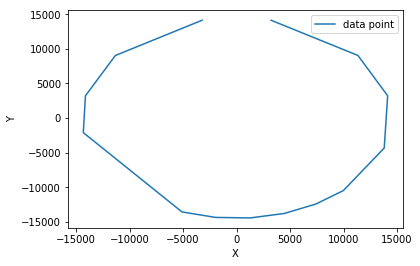

In [64]:
plt.figure(1)
plt.plot(data_xy[1,:],data_xy[2,:],label="data point")
plt.xlabel('X')
plt.ylabel('Y')
#plt.yscale("log", nonposy="clip")
#plt.xlim(left=0.3)
#plt.ylim(top=1e3*2)
#plt.ylim(bottom=0)
#plt.legend(loc='best')
plt.legend(loc='upper right')
ROC_file="figures/"+"RocRatio_Dijets.pdf"
ROC_file1=ROC_file.replace("pdf","jpg")
#plt.savefig(ROC_file1)
#plt.savefig(ROC_file)
plt.show()

In [27]:
X = data_xy[1:2,0:7]
Y = data_xy[2:3,0:7]
print(X,Y)

[[  3223.84807351  11339.59363155  14117.88288885  13796.70847553
    9977.92811361   7421.29039669   4453.31415611]] [[ 14124.76362984   9043.20917989   3222.53684802  -4322.56859302
  -10465.77997856 -12404.49409883 -13772.93062594]]


In [56]:
# Extract x coords and y coords of the ellipse as column vectors
#X = data_xy[1:2,:]
#Y = data_xy[2:3,:]
#X = data_xy[1:2,3:10]
#Y = data_xy[2:3,3:10]
Num=0
X = data_xy[1:2,0+Num:7-Num]
Y = data_xy[2:3,0+Num:7-Num]
#X = np.hstack((data_xy[1:2,3:6],data_xy[1:2,7:10]))
#Y = np.hstack((data_xy[2:3,3:6],data_xy[2:3,7:10]))
#print(X,Y)
X=np.reshape(X,(X.shape[1],1))
Y=np.reshape(Y,(Y.shape[1],1))
#print(X,Y)
# Formulate and solve the least squares problem ||Ax - b ||^2
#A = np.hstack([X**2, X * Y, Y**2, X, Y])
#A = np.hstack([X**3, X**2,  X, Y])
#A = np.hstack([Y**3, Y**2,  Y, X])
A = np.hstack([Y**4,Y**3, Y**2,  Y, X])
b = np.ones_like(X)*R
x = np.linalg.lstsq(A, b)[0].squeeze()

# Print the equation of the ellipse in standard form
#print('The ellipse is given by {0:.3}x^2 + {1:.3}xy+{2:.3}y^2+{3:.3}x+{4:.3}y = R2'.format(x[0], x[1],x[2],x[3],x[4]))
#print('The ellipse is given by {0:.3}x^3 + {1:.3}x^2+{2:.3}x+{3:.3}y = R2'.format(x[0], x[1],x[2],x[3]))
#print('The ellipse is given by {0:.3}y^3 + {1:.3}y^2+{2:.3}y+{3:.3}x = R'.format(x[0], x[1],x[2],x[3]))

rs=R/x[4]

print(rs,R-rs)



14307.7758367 292.22416327


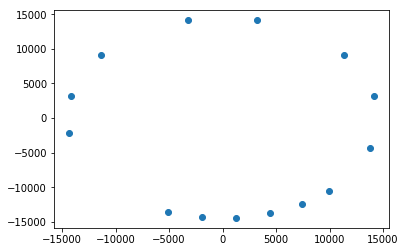

In [65]:
plt.scatter(X, Y, label='Data Points')

In [12]:
X_Eval=0.0
coeff = [0,0,0]
coeff[0]=x[2]
coeff[1]=x[1]*X_Eval+x[4]
coeff[2]=x[0]*X_Eval*X_Eval+x[3]*X_Eval-R*R*1.0
rs=np.roots(coeff)
print("Y axis")
print(coeff,rs)
print(R-rs[0],R+rs[1])
print(R+rs[0],R-rs[1])

Y_Eval=0.0
coeff = [0,0,0]
coeff[0]=x[0]
coeff[1]=x[1]*Y_Eval+x[3]
coeff[2]=x[2]*Y_Eval*Y_Eval+x[4]*Y_Eval-R*R*1.0
rs=np.roots(coeff)
print("X axis")
print(coeff,rs)
print(R-rs[1],R+rs[0])
print(R+rs[1],R-rs[0])

[1.0215436873466384, -91.715158879005628, -213160000.0] [ 14490.18764401 -14400.40669777]
109.81235599 199.593302234


[1.0160487186474074, 9.8862286697221151, -213160000.0] [-14489.10175798  14479.37168453]
120.628315474 110.898242016


In [ ]:
a=1+2

In [ ]:
x[0]x^2 + x[1]xy+x[2]y^2+x[3]x+x[4]y = R2
x[2]*y2+(x[1]*x+x[4])

In [79]:
def func(x, a, b, r):
    #if x[1,:]>0:
        #return b+np.sqrt(r*r-(x[0,:]-a)*(x[0,:]-a))
        return b-np.sqrt(r*r-(x-a)*(x-a))

[  -105.80091299    183.78748174  14232.45822116]


/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


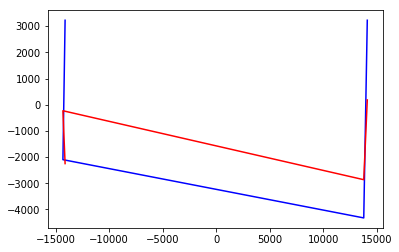

In [81]:
x_fit=data_xy[1,2:6]
y_fit=data_xy[2,2:6]
#print(x_fit,y_fit)
popt, pcov = curve_fit(func, x_fit, y_fit,bounds=([-200,-200,14000],[200,200,25000]))
print(popt)
plt.plot(x_fit, y_fit, 'b-', label='data')
plt.plot(x_fit, func(x_fit, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [68]:
func(0,*popt)+R

551.72251617739312